In [57]:
import matplotlib.pyplot as plt
import numpy as np
from lmfit.models import LinearModel

In [128]:
channel = 7

conv_pC_to_eV = 0.390176

In [117]:
if channel == 0:
    charges  = np.array([607.2,536.3,  #Co 1 e 2
                         311.8])       #Cs
    sigmas   = np.array([3.5,3.1, 
                         1.8])
    energies = np.array([1333,1173,    #Co 1 e 2
                         661.7])       #Cs
    
if channel == 7:
    chargesCs = [1695.9]
    chargesCo = [3613.6, 3172]
    #chargesBa = [992.7, 106.5]
    chargesBa = [989.8, 792.7, 100.6]

    energiesCs = [661.7]
    energiesCo = [1333, 1173]
    energiesBa = [366, 289, 81]

    sigmaCs = [20]
    sigmaCo = [43, 37]
    #sigmaBa = [11.7, 1.3]
    sigmaBa = [11.7, 9.3, 1.1]

    #sigmaCo = [20, 20]
    #sigmaBa = [20, 20]


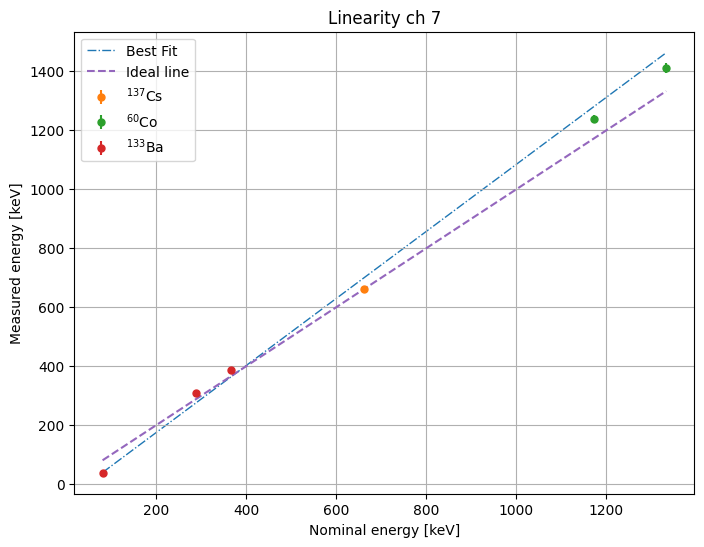

In [139]:
model = LinearModel(prefix = "l")

YY = np.array(chargesCs + chargesCo + chargesBa) * conv_pC_to_eV
sigmas = np.array(sigmaCs + sigmaCo + sigmaBa) * conv_pC_to_eV
params = model.guess(YY, x = energiesCs + energiesCo + energiesBa)

result = model.fit(YY, params, 
                   x = energiesCs + energiesCo + energiesBa, 
                   weights = 1 / sigmas)
comps = result.eval_components()                        #Plotto il best fit + le componenti


fig, (ax1) = plt.subplots(1, 1, figsize=(8, 6), sharex = True)


XX = np.array(energiesCs + energiesCo + energiesBa)
YY = np.array(result.best_fit)
ax1.plot([XX.min(), XX.max()], [YY.min(), YY.max()], label='Best Fit', zorder = -100, ls = "-.", marker = "", linewidth = 1)

#plt.plot(energiesCs, chargesCs, ls = "", marker = "o")
ax1.errorbar(energiesCs, np.array(chargesCs) * conv_pC_to_eV, np.array(sigmaCs) * conv_pC_to_eV, ls = "", label = r'$^{137}$Cs', marker = "o", markersize = 5)
ax1.errorbar(energiesCo, np.array(chargesCo) * conv_pC_to_eV, np.array(sigmaCo) * conv_pC_to_eV, ls = "", label = r'$^{60}$Co', marker = "o", markersize = 5)
ax1.errorbar(energiesBa, np.array(chargesBa) * conv_pC_to_eV, np.array(sigmaBa) * conv_pC_to_eV, ls = "", label = r'$^{133}$Ba', marker = "o", markersize = 5)

ax1.set_title(f'Linearity ch {channel}')
ax1.grid()
ax1.set_xlabel("Nominal energy [keV]")
ax1.set_ylabel("Measured energy [keV]")

axlim = [ax1.get_xlim(), ax1.get_ylim()]

plt.plot([XX.min(), XX.max()], [XX.min(), XX.max()], label = "Ideal line", ls = "--")

ax1.legend()


In [107]:
print(result.fit_report())

[[Model]]
    Model(linear, prefix='l')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 5
    # variables        = 2
    chi-square         = 30.4554776
    reduced chi-square = 10.1518259
    Akaike info crit   = 13.0341398
    Bayesian info crit = 12.2530156
    R-squared          = 0.99999647
[[Variables]]
    lslope:      2.76822682 +/- 0.06007437 (2.17%) (init = 2.768227)
    lintercept: -79.5854423 +/- 51.8449974 (65.14%) (init = -79.58544)
[[Correlations]] (unreported correlations are < 0.100)
    C(lslope, lintercept) = -0.8354
